# 상관분석

In [1]:
import pandas as pd

In [3]:
df = pd.read_excel('datas2/일별_금은달러.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      28 non-null     object 
 1   금값      28 non-null     float64
 2   은값      28 non-null     float64
 3   달러 환율   28 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.0+ KB


In [5]:
df.describe()

,금값,은값,달러 환율
count,28.000000,28.000000,28.000000
mean,72081.844643,21.830000,1197.721429
std,3309.328985,3.143131,5.459844
min,68269.270000,18.130000,1185.500000
25%,69744.952500,19.055000,1194.875000
50%,70117.345000,20.810000,1197.000000
75%,75110.485000,24.277500,1203.000000
max,78538.900000,28.390000,1206.500000


In [10]:
df = df.sort_values(by='일자')
df.head()

,일자,금값,은값,달러 환율
27,2020.06.30,68559.78,18.54,1203.0
26,2020.07.01,68941.28,18.13,1203.5
25,2020.07.02,68278.07,18.24,1199.0
24,2020.07.06,68269.27,18.50,1194.0
23,2020.07.07,68443.14,18.63,1197.0


## 시각화 하기

In [26]:
# 다음부턴 복붙해서 사용해도 됨
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (10, 8)

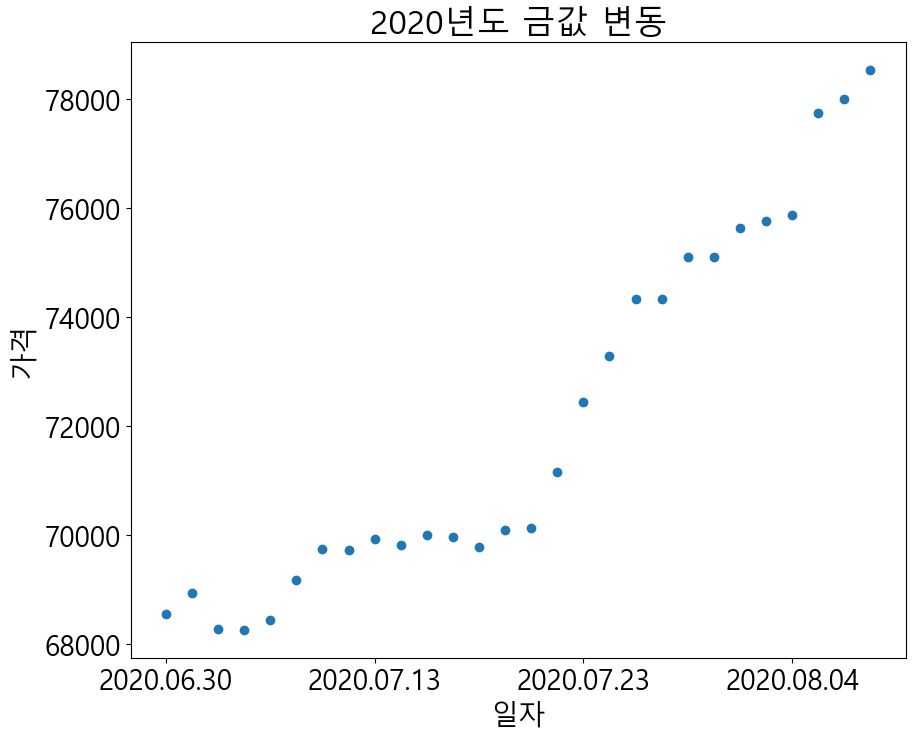

In [32]:
plt.scatter(df['일자'], df['금값'])
plt.title('2020년도 금값 변동')
plt.xticks(df['일자'].iloc[::8])
plt.xlabel('일자')
plt.ylabel('가격')
plt.show()

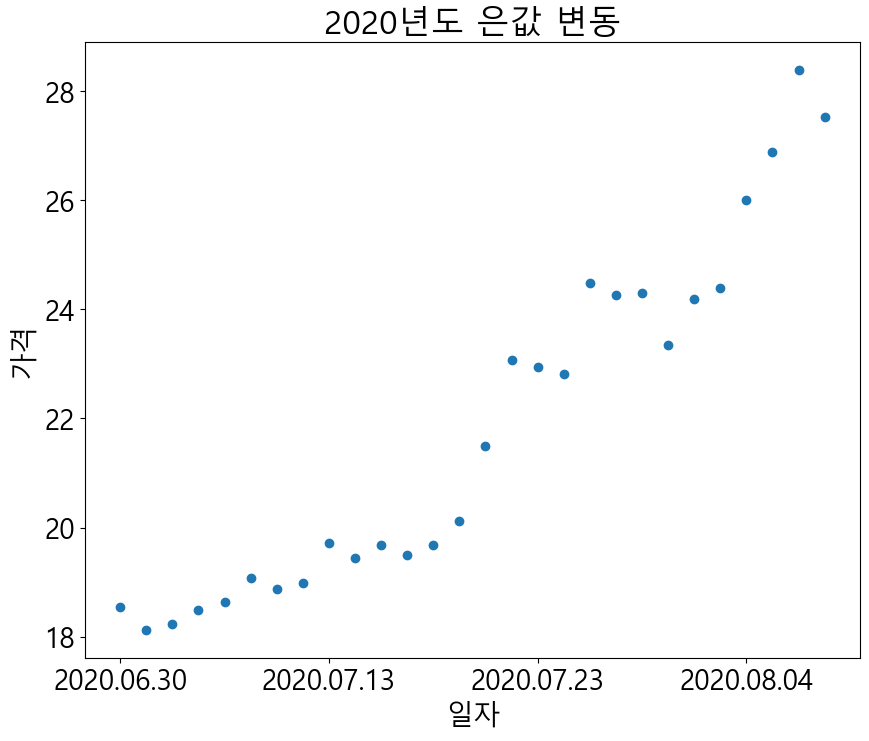

In [33]:
plt.scatter(df['일자'], df['은값'])
plt.title('2020년도 은값 변동')
plt.xticks(df['일자'].iloc[::8])
plt.xlabel('일자')
plt.ylabel('가격')
plt.show()

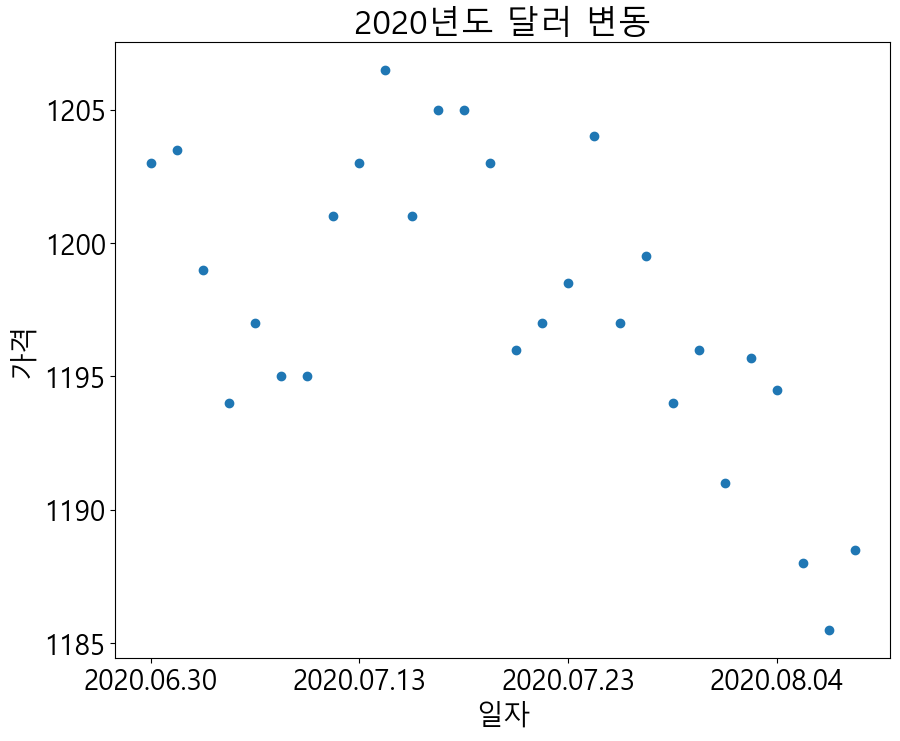

In [34]:
plt.scatter(df['일자'], df['달러 환율'])
plt.title('2020년도 달러 변동')
plt.xticks(df['일자'].iloc[::8])
plt.xlabel('일자')
plt.ylabel('가격')
plt.show()

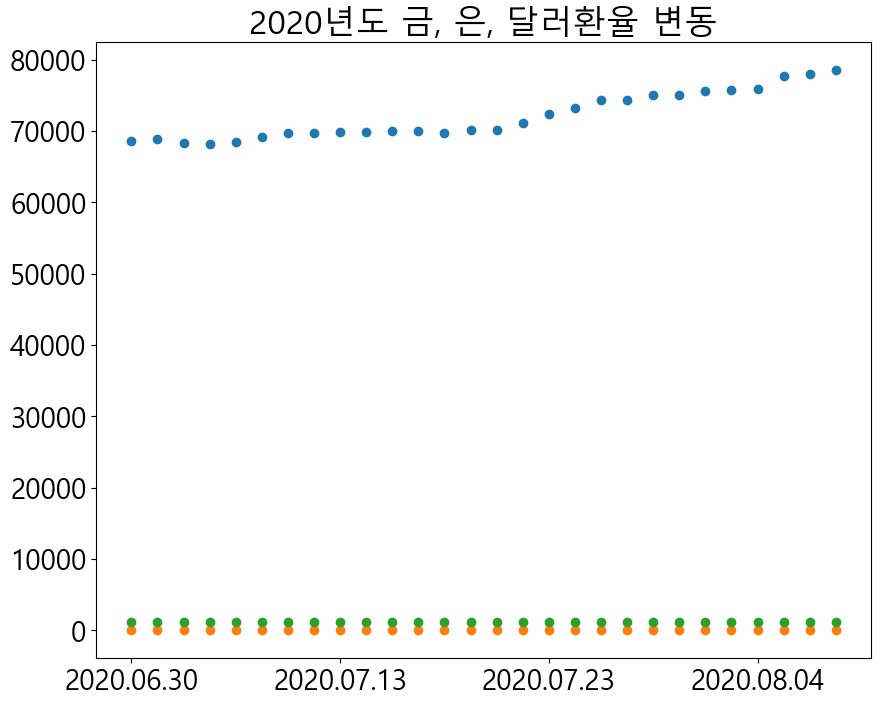

In [27]:
plt.scatter(df['일자'], df['금값'])
plt.scatter(df['일자'], df['은값'])
plt.scatter(df['일자'], df['달러 환율'])
plt.title('2020년도 금, 은, 달러환율 변동')
plt.xticks(df['일자'].iloc[::8])
plt.show()

## Scatter Matrix

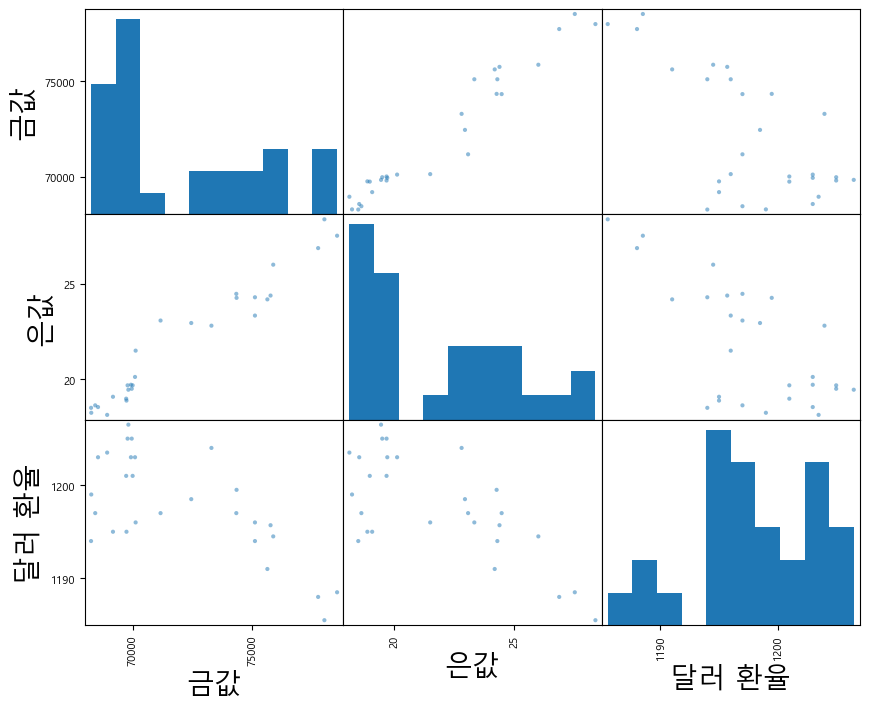

In [36]:
pd.plotting.scatter_matrix(df.drop('일자', axis = 1))
plt.show()

## 피어슨 상관계수

In [43]:
from scipy.stats import *
import itertools
target_columns = ['금값', '은값', '달러 환율']
for col1, col2 in itertools.combinations(target_columns, 2):
    result = pearsonr(df[col1], df[col2])
    print("{} ~ {}: coef:{}, p-value: {}".format(col1, col2, result[0], result[1]))

금값 ~ 은값: coef:0.9718640116033498, p-value: 7.508878356556173e-18
금값 ~ 달러 환율: coef:-0.6793266264341937, p-value: 7.03332525845226e-05
은값 ~ 달러 환율: coef:-0.695456955620356, p-value: 3.989042061957958e-05


## 데이터 프레임으로 상관계수 계산

In [44]:
df.head()

,일자,금값,은값,달러 환율
27,2020.06.30,68559.78,18.54,1203.0
26,2020.07.01,68941.28,18.13,1203.5
25,2020.07.02,68278.07,18.24,1199.0
24,2020.07.06,68269.27,18.50,1194.0
23,2020.07.07,68443.14,18.63,1197.0


In [48]:
df2 = df.drop('일자', axis=1)
df2.head()

,금값,은값,달러 환율
27,68559.78,18.54,1203.0
26,68941.28,18.13,1203.5
25,68278.07,18.24,1199.0
24,68269.27,18.50,1194.0
23,68443.14,18.63,1197.0


In [49]:
df.head()

,일자,금값,은값,달러 환율
27,2020.06.30,68559.78,18.54,1203.0
26,2020.07.01,68941.28,18.13,1203.5
25,2020.07.02,68278.07,18.24,1199.0
24,2020.07.06,68269.27,18.50,1194.0
23,2020.07.07,68443.14,18.63,1197.0


In [50]:
df2.corr(method='pearson')

,금값,은값,달러 환율
금값,1.000000,0.971864,-0.679327
은값,0.971864,1.000000,-0.695457
달러 환율,-0.679327,-0.695457,1.000000


In [51]:
df2.corr(method='spearman')

,금값,은값,달러 환율
금값,1.000000,0.971124,-0.503908
은값,0.971124,1.000000,-0.528106
달러 환율,-0.503908,-0.528106,1.000000
